In [47]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### **Importing dataset**

In [9]:
#importing dataset
d1=pd.read_csv("takehome_users.csv",encoding='unicode_escape')
d2=pd.read_csv('takehome_user_engagement.csv')

In [11]:
#rename the column object id  in d1 dataset to merge with d2
d1 = d1.rename(columns = {'object_id': 'user_id'}, inplace = False)

In [12]:
d1

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [14]:
#merge 2 dataset with common column name

df = pd.merge(d1, d2, on='user_id')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1.0


# **EDA**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150469 entries, 0 to 150468
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     150469 non-null  int64  
 1   creation_time               150469 non-null  object 
 2   name                        150469 non-null  object 
 3   email                       150469 non-null  object 
 4   creation_source             150469 non-null  object 
 5   last_session_creation_time  150469 non-null  float64
 6   opted_in_to_mailing_list    150469 non-null  int64  
 7   enabled_for_marketing_drip  150469 non-null  int64  
 8   org_id                      150469 non-null  int64  
 9   invited_by_user_id          82755 non-null   float64
 10  time_stamp                  150469 non-null  object 
 11  visited                     150469 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 14.9+ MB


Inference:
     
     
     As the column name such as Creation_time last_session_creation_time and time_stamp hasbeen based on time which has to be in datetime format.
      

In [17]:
#convert  into datatime

df['creation_time']=pd.to_datetime(df['creation_time'])
df['time_stamp']=pd.to_datetime(df['time_stamp'])
df['last_session_creation_time']= pd.to_datetime(df['last_session_creation_time'],unit='s')

In [18]:
#checking nan values
df.isnull().sum()

user_id                           0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            67714
time_stamp                        0
visited                           0
dtype: int64

Inference:
    
    Column name 'invited_by_user_id ' has null values thus drop that column for further analysis. 

In [19]:
df.drop(columns='invited_by_user_id',inplace=True)

In [25]:
#creating new column by sorting the data based on yearly, monthly, weekly 
df['week'] = df['last_session_creation_time'].dt.isocalendar().week
df['year']=df['last_session_creation_time'].dt.year
df['month']=df['last_session_creation_time'].dt.month

In [26]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_stamp,visited,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,2014-04-22 03:53:30,1.0,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-15 03:45:04,1.0,14,2014,3
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-11-29 03:45:04,1.0,14,2014,3
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-09 03:45:04,1.0,14,2014,3
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,2013-12-25 03:45:04,1.0,14,2014,3


In [49]:
#grouping data 
Group = df.groupby(['user_id','week','year', 'month','creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id'])['visited'].count().reset_index()

In [50]:
#creating  dataset where the user weekly visit is greater than 3
Group['adopted_users'] = Group['visited'].apply(lambda x: 'yes' if x >= 3 else 'no')
print("Total adopted users are - ",len(Group['adopted_users']))

Total adopted users are -  6349


In [51]:
Group

,user_id,week,year,month,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,visited,adopted_users
0,1,17,2014,4,GUEST_INVITE,1,0,11,1,no
1,2,14,2014,3,ORG_INVITE,0,0,1,14,yes
2,3,12,2013,3,ORG_INVITE,0,0,94,1,no
3,4,21,2013,5,GUEST_INVITE,0,0,1,1,no
4,5,4,2013,1,GUEST_INVITE,0,0,193,1,no
...,...,...,...,...,...,...,...,...,...,...
6344,8675,21,2014,5,ORG_INVITE,0,0,52,9,yes
6345,8676,2,2014,1,ORG_INVITE,1,0,403,1,no
6346,8677,43,2012,10,ORG_INVITE,0,0,354,4,yes
6347,8678,22,2014,5,ORG_INVITE,1,0,98,1,no


## **Data Visualization**

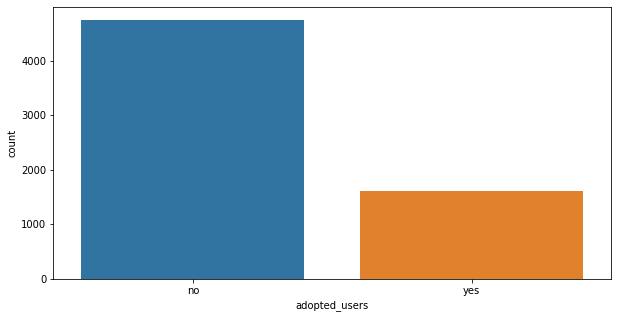

In [52]:

plt.figure(figsize=(10,5))
sns.countplot(x=Group.adopted_users)


Inference:
 
    About more than 4000 users are login more than three times in a week 

# **Encoding**

In [53]:
le = LabelEncoder()

In [54]:
#encoding categorical columns
for column in Group.columns:
  if Group[column].dtype == object:
    Group[column] = le.fit_transform(Group[column])

# **Machine Learning**

In [57]:
X=Group.drop(columns=['user_id','adopted_users','visited','year'],axis=1)
Y=Group['adopted_users']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=60)

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor = LogisticRegression()
regressor.fit(x_train,y_train)
logistic_regression_Score = regressor.score(x_test,y_test)*100
print("Logistic Regression score is :",logistic_regression_Score)

Logistic Regression score is : 74.48818897637796


### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)
DecisionTreeClassifier()
y_pred=decisiontree.predict(x_test)
score=decisiontree.score(x_test,y_test)
print("Decision Tree Score is:",score*100)

Decision Tree Score is: 73.22834645669292


### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier 
randomforest=RandomForestClassifier(max_depth=7,n_estimators=35,random_state=3)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_test)
score=randomforest.score(x_test,y_test)
print("Random Forest Score is:",score*100)

Random Forest Score is: 83.72703412073491


### XGBOOST Classifier

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=2,n_estimators=240,learning_rate=0.1)
xgb.fit(x_train,y_train)
xgb_score = xgb.score(x_test,y_test)*100
print("XGBoost  Score is :",xgb_score)

XGBoost  Score is : 83.35958005249344


Inference:

     Random Forest Classifier and XG Boost Classifier has the high score of 83%

## **Feature Importance**

In [63]:
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

week                          46.725623
month                         35.308700
org_id                        12.273393
creation_source                3.801906
opted_in_to_mailing_list       0.987124
enabled_for_marketing_drip     0.903255
dtype: float64

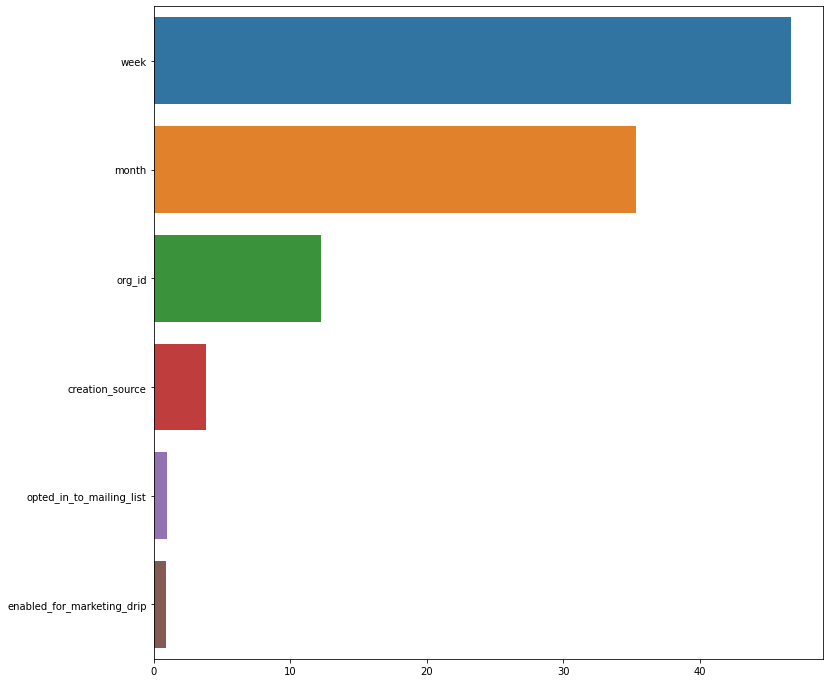

In [64]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

Inference:

    Week has highest feature importance and enabled_for_marketing_drip has least feature importance.

     Flow of Feature Importance is stated as:  week > month > org_id > creation_source > opted_in_to_mailing_list > enabled_for_marketing_drip